# Regresión Lineal

## Objetivo

- **Responde a la pregunta:** ¿Cómo el cambio de una variable afecta el valor de otra?

$$
y \xleftarrow{\text{afecta}} x
$$

- Busca determinar la relación entre una variable _independiente_ 

**Ejemplo 1**

- Mediante una regresión lineal, podemos buscar responder la pregunta ¿Cómo afecta la estatura de una persona en sus ingresos?
- Para ello usaremos el dataset `wages.csv`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")
sns.set(style=None, font_scale=1.5)

df = pd.read_csv("wages.csv")
df.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


## Algunas definiciones

### Variable Dependiente
- Objeto de estudio medido en una variable (salida, respuesta o etiqueta), normalmente denotada $y$.

### Variable Independiente

- Posibles factores explicativos (entrada, estímulo o característica) de la variable dependiente. Se denota normalmente como $x$.

**En nuestro ejemplo**
- Variable Dependiente $y$: Ingresos
- Variable Independiente $x$: Estatura

$$
\text{ingresos} \xleftarrow{\text{afecta}} \text{estatura}
$$

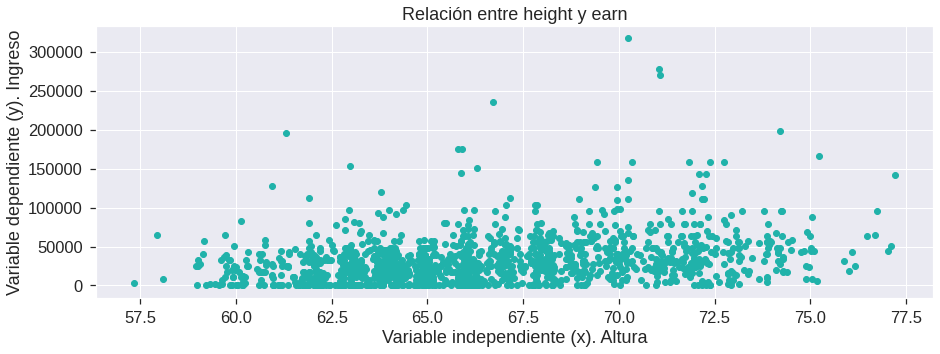

In [2]:
plt.figure(figsize=(15,5))
plt.scatter(x=df["height"], y=df["earn"], color="lightseagreen")
plt.xlabel("Variable independiente (x). Altura")
plt.ylabel("Variable dependiente (y). Ingreso")
plt.title("Relación entre height y earn");

### Modelo

- Aproximación funcional a nuestro fenómeno.
- Permite entender cómo cambia la variable dependiente cuando la variable independiente es modificada.
- Esta _relación_ entre ambas variables es representada por una _función_, y corresponde a la recta en el caso del gráfico anterior, más su error asociado.
<br />
<br />

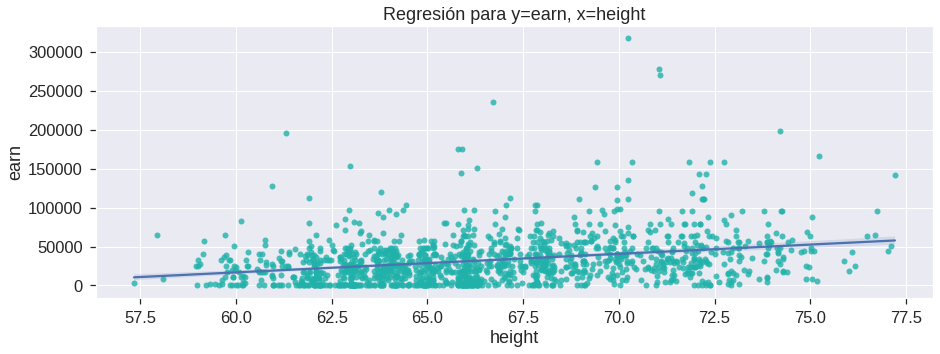

In [3]:
plt.figure(figsize=(15,5))
sns.regplot(x=df["height"], y=df["earn"], scatter_kws={"color": "lightseagreen"})
plt.title("Regresión para y=earn, x=height");

### Coeficientes

- Componentes estimados del modelo que permiten aproximar características de los datos en la variable dependiente.
- Corresponden a la _pendiente_ de la recta de la regresión lineal, y al _intercepto_.
- Dependiendo del contexto, se pueden denotar como $\theta$, $\beta$. En este curso normalmente usaremos $\beta$ (beta).
- $\beta_0$ corresponde al _incercepto_ y $\beta_1, \beta_2, ..., \beta_n$ a los coeficientes asociados a las variables independientes del modelo.
- Mientras más "distinto de 0" sea un coeficiente asociado a una variable independiente, se tiene entonces un mayor efecto de esa variable independiente sobre la variable dependiente; Un coeficiente de 0 equivale a _no tener pendiente_, o sea una línea horizontal.
- La _pendiente_ corresponde también al "valor promedio" o _valor esperado (esperanza)_ para la variable independiente.

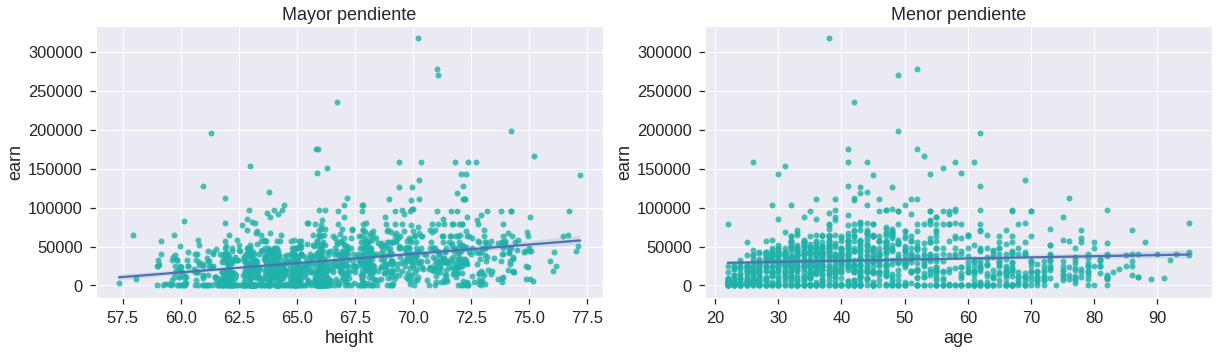

In [3]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.regplot(x=df["height"], y=df["earn"], scatter_kws={"color": "lightseagreen"})
plt.title("Mayor pendiente")

plt.subplot(1, 2, 2)
sns.regplot(x=df["age"], y=df["earn"], scatter_kws={"color": "lightseagreen"})
plt.title("Menor pendiente");

### Error

- Término residual asociado a lo no explicado por el modelo.
- Corresponde a la diferencia entre la línea del modelo de regresión lineal y los valores reales.
- Se denota como $\epsilon$ (epsilon)

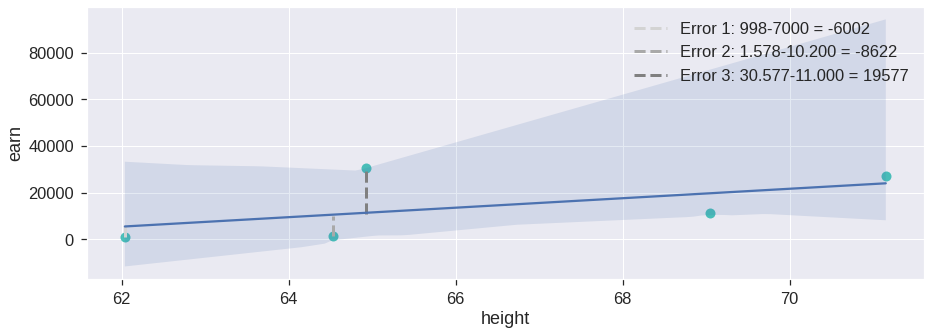

In [4]:
muestra = df.sample(5, random_state=1)
plt.figure(figsize=(15,5))
plt.vlines(62.04, ymax=7000, ymin=998, lw=3, ls="--", color="lightgrey", label=f"Error 1: 998-7000 = {998-7000}")
plt.vlines(64.53, ymax=10200, ymin=1578, lw=3, ls="--", color="darkgrey", label=f"Error 2: 1.578-10.200 = {1578-10200}")
plt.vlines(64.93, ymax=30577, ymin=11000, lw=3, ls="--", color="grey", label=f"Error 3: 30.577-11.000 = {30577-11000}")
sns.regplot(x=muestra["height"], y=muestra["earn"], scatter_kws={"color": "lightseagreen", "s": 100})
plt.legend();

**Recordemos la "ecuación de la recta del colegio"**
$$
y = m \cdot x + n
$$

Podemos hacer la analogía con nuestro modelo, solo que en este caso debemos incorporar el **error**; Nuestras rectas del colegio eran "deterministas", donde el valor de $x$ determinaba _exactamente_ el valor de $y$. Pero en nuestro caso estamos trabajando con _variables aleatorias_, por lo que se debe asociar un _error_.
$$
y_i = \beta_1 \cdot x_i + \beta_0 + \epsilon_i
$$

En nuestro ejemplo sería
$$
\text{earn}_i = \beta_{height} \cdot \text{height}_i + \beta_0 + \epsilon_i
$$

## Codificación de variables categóricas

- Como el modelo corresponde a una función matemática, nuestras variables deben corresponder a _números_.
- Por tanto, para nuestras variables categóricas debemos realizar una _codificación_ que permita representarlas como números, en caso que se requiera utilizarlas como variables independientes para el modelo.
- Las más utilizadas son _One Hot Encoding_, _Binary Encoding_, y _Label Encoding_.

**Ejemplo 2**
- Mediante una regresión lineal, podemos buscar responder la pregunta ¿Cómo afecta la raza de una persona en sus ingresos?
- Para ello, debemos realizar una codificación en la variable categórica _race_

### One Hot Encoding
- Se crea una variable binaria (con valor 1 si la característica está presente, y valor 0 cuando no lo está), para cada categoría presente en la variable categórica.
- Genera $k$ variables binarias, siendo $k$ la cantidad de categorías en la variable a codificar.
- En Python esto se logra fácilmente con el método `get_dummies()` de `pandas`, o la clase `OneHotEncoder` de `sklearn.preprocessing`.

In [5]:
# Exploramos las categorías presentes en race
df["race"].value_counts()

white       1147
black        126
hispanic      77
other         29
Name: race, dtype: int64

In [6]:
# Al aplicar OHE, se obtiene un DataFrame de 4 columnas, ya que hay 4 categorías para race
race_ohe = pd.get_dummies(df["race"])
race_ohe.sample(5, random_state=42)

,black,hispanic,other,white
599,0,0,0,1
881,0,0,0,1
634,1,0,0,0
425,0,0,0,1
906,1,0,0,0


### Binary encoding
- Crea $k-1$ variables binarias para la variable categórica a codificar.
- La categoría que se omite en la creación de las columnas puede ser cualquiera, aunque muchas veces la que se omite es la de mayor frecuencia.
- En Python, se le debe indicar el argumento `True` al parámetro `drop_first` de `pd.get_dummies()`.

In [8]:
df.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


In [10]:
# Al aplicar binary encoding, se obtiene un DataFrame de 3 columnas, donde se omite la categoría 'black', que es la primera en orden alfabético
race_be = pd.get_dummies(df["race"], drop_first=True)

# Sabemos que los registros 634 y 906 son black (categoría omitida), porque tienen las otras 3 en 0
race_be.head()

,hispanic,other,white
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1


### Label encoding
- No crea variables adicionales, sino que cambia la codificación _en la misma columna_.
- Usualmente, asigna a cada categoría un número entero desde 0 hasta $k-1$.
- En Python, se puede aplicar `replace` de `pandas`, o la clase `LabelEncoder` de `sklearn.preprocessing`.

In [11]:
from sklearn.preprocessing import LabelEncoder

# Se crea una instancia de la clase
le = LabelEncoder()

# Se transforma la variable. Asigna 0 a la primera categoría en orden alfabético, y aumenta en 1 hasta la última en orden algabético
race_le = le.fit_transform(df["race"])

# Se mantiene 1 columna con valores entre 0 y 3
pd.Series(race_le).value_counts()

3    1147
0     126
1      77
2      29
dtype: int64

- ¿Por qué en nuestro ejemplo esta codificación no es adecuada?

Label Encoding, al asignar distintos valores numéricos a distintas categorías, indirectamente le está dando una _jerarquía_ o _mayor peso_ a las distintas categorías; Al momento de modelar, las personas de raza blanca tendrán "mayor peso" que las personas de raza negra, ya que tienen asignados los valores 3 y 0 respectivamente. Lo podríamos aplicar en caso de haber utilizado una variable independiente con solo 2 categorías, como `sex`.

**Regresión para este ejemplo**
- Para la regresión lineal, se deben cumplir algunos "requisitos" que exploraremos en detalle más adelante. Pero uno de ellos, es que las variables independientes _no pueden tener correlaciones altas entre sí_. Esto se traduce en que debemos utilizar una codificación _binary encoding_, ya que si se incluyen todas las categorías, se producirían _correlaciones perfectas_:
    - Ser de raza negra = No ser de raza hispana, ni de otra, ni blanca
    - a = b
    - Ambas condiciones tienen una correlación perfecta
    
- Por lo tanto, para realizar el modelo de regresión en este caso se debe considerar 3 variables independientes:
$$
\text{earn}_i = \beta_0 + \beta_{hispanic} \cdot \text{hispanic}_i + \beta_{other} \cdot \text{other}_i + \beta_{white} \cdot \text{white}_i + \epsilon_i
$$

- Como tenemos 3 variables independientes, no podemos graficar la regresión, ya que el gráfico sólo nos admite hasta 3 dimensiones, y en este caso tenemos 4... :(.
- De todas formas, aunque no podemos "ver la regresión", el computador sí es capaz de calcularla. Por ello, se debe incorporar las nuevas variables creadas en nuestro set original, para que así se puedan asociar a sus valores de _earning_ correspondientes.

In [10]:
# Añadimos el DataFrame creado con BE al set de datos

df_be = pd.concat(
    [df, race_be],     # Con 'concat' le pasamos la lista de dataframes que queremos "unir"
    axis=1             # Con axis=1 indicamos que la concatenación se debe hacer "hacia el lado" (añade las columnas del segundo dataframe al final)
)

df_be.head()

,earn,height,sex,race,ed,age,hispanic,other,white
0,79571.299011,73.89,male,white,16,49,0,0,1
1,96396.988643,66.23,female,white,16,62,0,0,1
2,48710.666947,63.77,female,white,16,33,0,0,1
3,80478.096153,63.22,female,other,16,95,0,1,0
4,82089.345498,63.08,female,white,17,43,0,0,1


# Regresión Lineal desde la Econometría
$$
\begin{align}
y_i &= \beta_0 + \beta_1 \cdot x_{i1} +,...,+ \beta_m \cdot x_{im} + \epsilon_i \\
&= \boldsymbol{x}_i^\top \boldsymbol{\beta} + \epsilon_i \\
&= f(x_i)  + \epsilon_i
\end{align}
$$
- $y_i$: Variable dependiente para el dato $i$
- $\beta_0$: Intercepto (dónde intercepta la recta al eje x; Valor de $y_i$ cuando la combinación lineal de las variables independientes $x_{i1},...,x_{im}$ es 0)
- $\beta_1,...,\beta_n$: Coeficientes (o _pendientes_, o _parámetros_) asociadas a las variables independientes. Los coeficientes son _fijos_ (no aleatorios), pero desconocidos.
- $x_{i1},...,x_{im}$: Variables independientes
- $\epsilon_i$: Error asociado al dato $i$. Los errores son variables aleatorias iid $\sim \mathcal{N}(0, \sigma^2)$, por lo que corresponde a la _parte aleatoria_ del modelo.
- $i$: Posición ("fila") del dato
- $m$: Cantidad de variables independientes ("columnas")
- $\boldsymbol{x}_i^\top \boldsymbol{\beta}$: Notación de vector. El $^\top$ significa "transpuesto". Es la parte funcional _determinista_ del modelo (por eso también se usa la notación $f(x)$), para las observaciones $x_i$ específicas.

<br />
<br />

**En notación matricial**
$$
Y = X \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

- $Y$: $Y= [y_i,...,y_n]. $Vector de dimensiones $n \times 1$ (siendo $n$ la cantidad de filas) que contiene los valores de la variable dependiente de todos los datos.
- $X$: Matriz de dimensiones $n \times m$ que contiene todas las variables independientes para todos los datos.
- $\boldsymbol{\beta}$: Vector de dimensiones $m \times 1$ que contiene todos los coeficientes, asociados a todas las variables independientes. 
- $\boldsymbol{\epsilon}$: Vector de dimensiones $n \times 1$ que contiene los valores de los errores para todos los datos. 


<br />
<br />

## Conceptualizaciones de la Regresión

- Forma más simple: La _variable dependiente_ es continuas.
- Como se vio previamente, al realizar un diagrama de dispersión y agregar la recta de ajuste, estamos generando una regresión.
- Mediante la regresión, buscamos generar una explicación plausible de cómo la _variable independiente_ afecta en promedio los niveles de la _variable dependiente_.

## Nuestra primera regresión

$$
\text{earn}_i = \beta_0 + \beta_{\text{height}} \cdot \text{height}_i + \epsilon_i
$$

## Statsmodels

- Para implementar nuestra regresión utilizaremos el módulo `ols` de la librería `statsmodels`.
- Este genera un modelo de regresión mediante el método de _mínimos cuadrados ordinarios_ (Ordinary Least Squares).

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model1 = smf.ols(     # Iniciamos el modelo
    'earn ~ height',  # Indicamos lo que queremos modelar. Debemos usar la notación de patsy: '<variable dependiente> ~ <variables independientes>'
    data = df         # Indicamos el set de datos
).fit()               # Entrenamos el modelo

## Bondad de ajuste
- Métricas que informan sobre la capacidad explicativa y desempeño general del modelo.
- Nos sirven para saber _"qué tan bueno es el modelo"_.

### R-squared y Adj. R-squared: 
- Se denota $R^2$.
- Cuando se tiene "muchas" variables independientes (usualmente más de 3), se debe observar el $R^2$ _ajustado_, ya que penaliza por la cantidad de regresores.
- Responde: ¿Cuál es la **capacidad explicativa** de nuestros regresores (variables independientes) en la **variabilidad** de los puntajes de nuestro objetivo (variable dependiente)?
- _Generalmente_ sus valores van entre 0 y 1, siendo 1 una "explicación perfecta" de los regresores sobre el objetivo.
    - **NOTA**: Si se obtiene un $R^2$ negativo, quiere decir que el modelo ajustado "es peor que una línea horizontal".

**En nuestro ejemplo**
_¿Cómo explica la altura la variabilidad de los ingresos?_

In [14]:
print(f"La altura explica en un {round(model1.rsquared * 100)}% la variabilidad de los ingresos")

La altura explica en un 9% la variabilidad de los ingresos


### F-Statistic y Prob(F-Statistic):
- Prueba de rango de variabilidad entre partes explicadas y no explicadas.
- _F-statistic_ corresponde al _estadístico de prueba_ utilizado en la siguiente prueba de hipótesis:
    - $H_0$: "Los regresores _no_ explican la variabilidad del objetivo" $\rightarrow$ Ningún coeficiente es estadísticamente distinto de 0
    - $H_1$: "Los regresores _sí_ explican la variabilidad del objetivo" $\rightarrow$ Al menos _uno_ de los coeficientes es estadísticamente distinto de 0

- _Prob(F-Statistic)_ corresponde al "_p-value_" asociado a esta prueba de hipótesis (probabilidad de error)
- Recordar que para rechazar $H_0$ se busca "un valor de estadístico grande, y un _p-value_ chico"

**En nuestro ejemplo**
_¿Existe evidencia para rechazar que la altura no explica la variabilidad en el ingreso?_

In [15]:
# Considerando un 95% de confianza
print(f"{'Sí' if model1.f_pvalue < 0.05 else 'No'} existe evidencia para rechazar la hipótesis nula")

Sí existe evidencia para rechazar la hipótesis nula


### Log-Likelihood (Log-Verosimilitud): 
- Logaritmo de la _verosimilitud_ del modelo. Se utiliza el logaritmo de la verosimilitud ya que es más fácil de optimizar.
- La función de verosimilitud cuantifica cuán verosímil es un modelo de haber _generado_ las observaciones.
- La _máxima_ verosimilitud es un criterio general para una amplia gama de modelos que toma una forma específica para cada problema; No solo se usa en regresión, sino que también sirve para _clasificación_.
    - Su objetivo es encontrar el modelo que, con mayor probabilidad, ha generado _exactamente_ los datos observados.
    - Un modelo con _mayor verosimilitud_ (más cercana a 0, ya que siempre es negativa) tiene _mejor ajuste_.
    - Un valor aislado de verosimilitud no tiene interpretación; Se debe _comparar_ al menos dos modelos, siendo el mejor el con mayor verosimilitud.
    
**En nuestro ejemplo**

_¿Qué modelo tiene mayor probabilidad de haber generado nuestros datos?_
- `earn ~ height`
- `earn ~ age`

In [17]:
model_age = smf.ols('earn ~ age', data = df).fit()    

print(f"La log verosimilitud del modelo earn ~ height es de {round(model1.llf, 2)}")
print(f"La log verosimilitud del modelo earn ~ age es de {round(model_age.llf, 2)}")
print(f"El modelo que tiene mayor probabilidad de haber generado nuestros datos es {'earn ~ height' if model1.llf > model_age.llf else 'earn ~ age'}")

La log verosimilitud del modelo earn ~ height es de -16167.59
La log verosimilitud del modelo earn ~ age es de -16225.08
El modelo que tiene mayor probabilidad de haber generado nuestros datos es earn ~ height


### AIC (Criterio de información de Akaike): 
- Es una métrica de calidad relativa del ajuste de un modelo a los datos.
- Debe ser comparado siempre con respecto al valor AIC de otros modelos entrenados sobre los mismos datos y bajo las mismas condiciones, prefiriendo aquel con menor valor de AIC.


### BIC (Criterio de Información Bayesiano): 
- Métrica de ajuste relativo que debe ser comparada de entre los valores obtenidos para un conjunto de modelos candidatos.
- Se diferencia de AIC en que penaliza la presencia de muchos regresores; Se obtiene mejores valores en modelos con menor cantidad de regresores.
- Debe ser comparada de entre los valores obtenidos para un conjunto de modelos candidatos, prefiriendo siempre aquél con menor valor de BIC. 

In [19]:
print(f"El modelo que tiene menor valor AIC es {'earn ~ height' if model1.aic < model_age.aic else 'earn ~ age'}")
print(f"El modelo que tiene menor valor BIC es {'earn ~ height' if model1.bic < model_age.bic else 'earn ~ age'}")

El modelo que tiene menor valor AIC es earn ~ height
El modelo que tiene menor valor BIC es earn ~ height


## Coeficientes

### Interpretación descriptiva de los coeficientes
- Cómo los valores de una variable dependiente numérica varían en subpoblaciones definidas por una función lineal de atributos.
- Los coeficientes de regresión representan el cambio medio en la variable de respuesta para una unidad de cambio en la variable predictora mientras se mantienen constantes los otros predictores presentes en el modelo.

**En nuestro ejemplo**
_¿Cuánto cambia el ingreso al aumentar la altura en 1 unidad?_

In [20]:
coef_height = model1.params['height']

print(f"Al aumentar la altura en 1 pulgada el ingreso {'aumenta' if coef_height > 0 else 'disminuye'} en {round(coef_height, 2)} dólares")

Al aumentar la altura en 1 pulgada el ingreso aumenta en 2387.2 dólares


- Para corroborar que el valor del coeficiente es estadísticamente significativo, se observa el _p-value_

In [21]:
# Considerando un 95% de confianza
print(f"{'Es' if model1.pvalues['height'] < 0.05 else 'No es'} significativo")

Es significativo


### Interpretación causal de los coeficientes
- Cómo el cambio en nuestra variable independiente _causa_ cambios en nuestra variable dependiente.
- El problema de la interpretación causal es que se requiere de muchos supuestos para que sea válida.

**En nuestro ejemplo**

- La interpretación causal sería: "_En la medida que un individuo crezca una pulgada, esperamos un incremento en su salario de 2.387 dólares_".
- La interpretación es menos flexible, puesto que forzamos un determinado flujo causal; $\text{height} \rightarrow \text{earn}$ implica que de forma irrestricta el salario subirá en la medida que la altura aumenta.

In [18]:
# Exploramos el modelo entrenado
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.084     
Dependent Variable:   earn               AIC:                  32339.1900
Date:                 2022-07-28 22:16   BIC:                  32349.6482
No. Observations:     1379               Log-Likelihood:       -16168.   
Df Model:             1                  F-statistic:          128.0     
Df Residuals:         1377               Prob (F-statistic):   1.96e-28  
R-squared:            0.085              Scale:                8.9458e+08
-------------------------------------------------------------------------
             Coef.      Std.Err.     t    P>|t|     [0.025       0.975]  
-------------------------------------------------------------------------
Intercept -126523.3590 14075.8545 -8.9887 0.0000 -154135.7975 -98910.9205
height       2387.1955   211.0262 11.3123 0.0000    1973.2279   2801.1632
-------------------------------------------------------------------------
Omnibus:                871.107        Durbin-Watson:           1.900    
Prob(Omnibus):          0.000          Jarque-Bera (JB):        13741.908
Skew:                   2.676          Prob(JB):                0.000    
Kurtosis:               17.509         Condition No.:           1166     
=========================================================================
* The condition number is large (1e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

## Validez de las estimaciones

### Método de Mínimos Cuadrados Ordinarios
**Objetivo**: Encontrar un estimador que reduzca la distancia residual entre los valores predichos y sus correlatos observados.
- Elegir la _función_ (o modelo) que minimiza la suma de los cuadrados de las diferencias entre las observaciones $Y$ presentes en los datos y las _predicciones_ calculadas por el modelo, denotadas como $\hat Y$. Cada valor $\hat y_i$ dentro del vector $\hat Y$ corresponde a
$$
\hat y_i = \hat \beta_0 + \hat \beta_1 \cdot x_{i1} +,...,+ \hat \beta_m x_{im}
$$

- Esta elección se realiza de acuerdo al siguiente _costo_ (denotado $J$)
$$
J = \sum_{i=1}^{n} (y_i - \hat y)^2
$$

- Por tanto, nuestros $\boldsymbol{\beta}$ _óptimos_ corresponden a los obtenidos al minimizar $J$
$$
\boldsymbol{\beta}_{\text{optimos}} = \underset{\boldsymbol{\beta}}{\text{argmin}} \sum_{i=1}^{n} (y_i - \hat y)^2
$$

- Como el costo es _cuadrático_, el problema de optimización tiene un único mínimo que puede ser encontrado explícitamente utilizando condiciones de primer orden, obteniéndose finalmente

$$
\boldsymbol{\beta} = (X ^\top X) ^{-1} X^\top Y
$$

### Teorema de Gauss Markov

- El cumplimiento de las condiciones de Gauss Markov nos asegurará que el estimador (modelo óptimo) será el estimador lineal insesgado y óptimo, obteniendo el estimador eficiente dentro de la clase de estimadores lineales insesgados.

<br />
<br />

- El teorema de Gauss-Markov descansa en cinco supuestos:
    1. **La media del error es 0**:
    - $\mathbb{E}[\epsilon_i] = 0$
    <br />
    2. **Independencia del error y las variables explicativas**:
    - $\mathbb{E}[\epsilon_i|X] = \mathbb{E}[\epsilon_i] = 0$
    <br />
    3. **Ausencia de correlación entre los residuos**:
    - $\text{Cov}(\epsilon_i, \epsilon_j|X) = 0$ (con $i \neq$ j)
    4. **Ausencia de correlación entre la varianza de los errores y las variables (Homocedasticidad)**:
    - $\text{Var}(\epsilon_i|X) = \text{Var}(\epsilon_i) = \sigma ^2$
    5. **Distribución normal de los errores**:
    - $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$

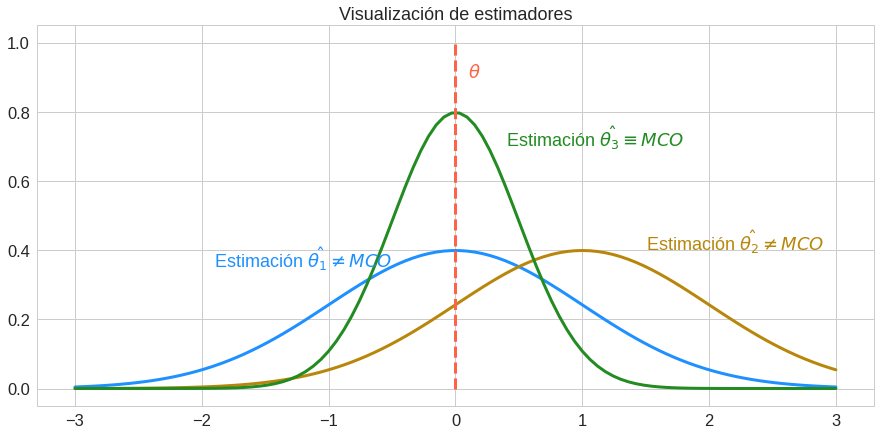

In [22]:
import lec5_graphs as gfx

plt.figure(figsize=(15,7))
gfx.gauss_markov()

- $\hat \theta_1$ tiene una media similar a nuestro parámetro verdadero $\theta$, pero su varianza es grande.
- $\hat \theta_2$ tiene una media superior al parámetro verdadero y una varianza similar a la primera estimación. Falla en capturar el parámetro poblacional, por lo que es descartada.
- $\hat \theta_3$ tiene una media idéntica a la primera estimación, pero una menor varianza. Satisface las condiciones de Gaus-Markov por sobre $\hat \theta_1$, dado que su varianza es menor y asegura que el error tendrá una media menor.

**Diagnósticos**

Una serie de diagnósticos de los errores nos permite determinar si el modelo satisface las condiciones de Gauss-Markov

eval_env: 1


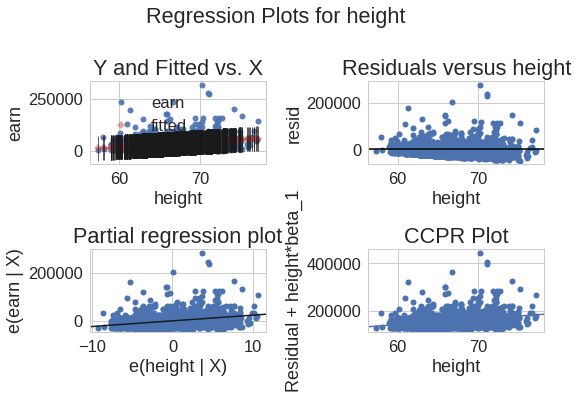

In [23]:
sm.graphics.plot_regress_exog(model1, 'height')
plt.tight_layout();

- En la práctica, este tipo de diagnósticos no suele realizarse mucho. Esto ya que generalmente se trabaja con modelos múltiples (de varios regresores, no pudiéndose graficar), y porque además _raramente_ se cumplen todos estos supuestos; Se _"asume"_ que se cumplen, y luego si esto es falso se traducirá por ende en _"un modelo no tan bueno"_.

# Variantes de la Regresión Lineal

## Variables Binarias
- Nuestra variable independiente toma dos valores
- Las columnas binarias se generan usando _Binary Encoding_
- La convención es siempre como `0` aquella característica _más común_, dado que podemos capturar el comportamiento más común mediante el _intercepto_.

**Ejemplo 3** 

_¿Cómo afecta el género de una persona en sus ingresos?_

$$
\text{earn}_i = \beta_0 + \gamma_{male} \cdot \text{male}_i + \epsilon_i
$$

- Primero se codifica la variable `sex` en forma binaria.
- Lo realizaremos usando `replace()` de `pd.Series`.
- Aplicaremos `1` a la categoría de menor frecuencia; "Estamos generando solo 1 columna, omitiendo la que correspondería a la categoría de mayor frecuencia"

In [24]:
# Exploramos las frecuencias
df["sex"].value_counts()

female    859
male      520
Name: sex, dtype: int64

In [25]:
# Aplicamos la codificación
df["male"] = df["sex"].replace(["female", "male"], [0, 1])

df["male"].value_counts()

0    859
1    520
Name: male, dtype: int64

In [26]:
# Generamos el modelo y entrenamos
model_male = smf.ols("earn ~ male", data=df).fit()

# Revisamos R^2
print(f"El hecho de ser hombre explica en un {round(model_male.rsquared * 100)}% la variabilidad de los ingresos")

El hecho de ser hombre explica en un 11% la variabilidad de los ingresos


- Podemos obtener el salario promedio para cada género observando los coeficientes
    - Para el caso de "ser mujer", el coeficiente corresponde al intercepto, y corresponde a su salario promedio
    - Para el caso de "ser hombre", el salario promedio corresponde a su coeficiente _más_ el valor del intercepto

In [27]:
# Coeficientes
print(
    f"El salario promedio de las mujeres es {round(model_male.params['Intercept'], 2)} dólares. "
    f"Su coeficiente {'es' if model_male.pvalues['Intercept'] < 0.05 else 'no es'} signifivativo."
)

print(
    f"El salario promedio de los hombres es {round(model_male.params['male'] + model_male.params['Intercept'], 2)} dólares. "
    f"Su coeficiente{'es' if model_male.pvalues['male'] < 0.05 else 'no es'} signifivativo."
)

El salario promedio de las mujeres es 24245.65 dólares. Su coeficiente es signifivativo.
El salario promedio de los hombres es 45993.13 dólares. Su coeficientees signifivativo.


In [30]:
model_male.params

Intercept    24245.647877
male         21747.479045
dtype: float64

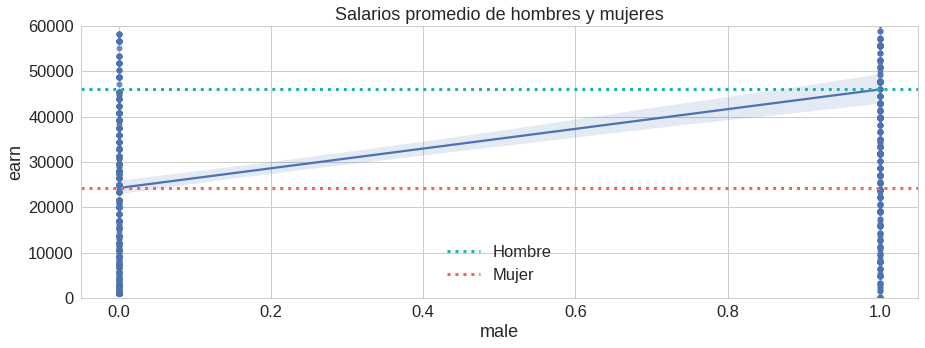

In [28]:
plt.figure(figsize=(15,5))
sns.regplot(x=df['male'], y=df['earn'])
plt.axhline(model_male.params['male'] + model_male.params['Intercept'], color="lightseagreen", label="Hombre", lw=3, ls="dotted")
plt.axhline(model_male.params['Intercept'], color="tomato", label="Mujer", lw=3, ls="dotted")
plt.title("Salarios promedio de hombres y mujeres")
plt.ylim([0, 60000])
plt.legend();

In [29]:
print(f"El hecho de ser hombre aumenta en promedio en {round(model_male.params['male'], 2)} dólares el salario")

El hecho de ser hombre aumenta en promedio en 21747.48 dólares el salario


## Términos polinomiales
- Se debe tener en consideración que cuando hablamos de "regresión _lineal_", nos referimos a que la regresión es lineal _en los parámetros_ (coeficientes). Es decir, es posible realizar transformaciones _no lineales_ en los regresores.
- Un ejemplo típico es la transformación polinomial.

**Ejemplo 4** 

_¿Cómo afecta el término polinomial de grado 2 de la edad en los ingresos?_

$$
\text{earn}_i = \beta_0 + \beta_{age} \cdot \text{age}_i + \beta_{age^2} \cdot \text{age}_i^2 + \epsilon_i
$$

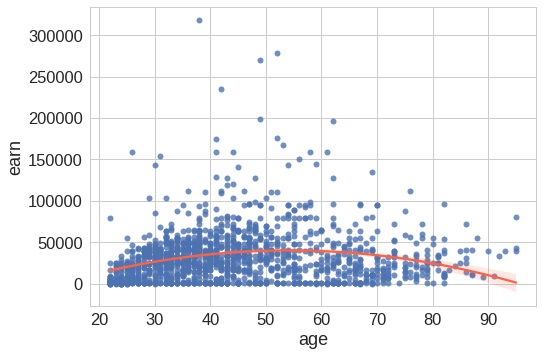

In [31]:
# Observamos el polinomio de grado 2 añadiendo el parámetro "order" en regplot
sns.regplot(x=df["age"], y=df["earn"], order=2, line_kws={'color':'tomato'});

In [32]:
# Se agrega el término polinomial al ser de datos
df["age_sq"] = df["age"] ** 2

# Se crea el modelo. Se agregan las 2 columnas del polinomio
model_poli = smf.ols("earn ~ age + age_sq", data=df).fit()

model_poli.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:               OLS               Adj. R-squared:      0.048     
Dependent Variable:  earn              AIC:                 32393.4719
Date:                2022-08-22 20:43  BIC:                 32409.1593
No. Observations:    1379              Log-Likelihood:      -16194.   
Df Model:            2                 F-statistic:         35.96     
Df Residuals:        1376              Prob (F-statistic):  5.97e-16  
R-squared:           0.050             Scale:               9.2982e+08
----------------------------------------------------------------------
             Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
----------------------------------------------------------------------
Intercept -28350.9059 7215.5895 -3.9291 0.0001 -42505.6521 -14196.1597
age         2526.2928  301.9963  8.3653 0.0000   1933.8698   3118.7158
age_sq       -23.3161    2.9146 -7.9998 0.0000    -29.0336    -17.5986
----------------------------------------------------------------------
Omnibus:               851.508       Durbin-Watson:          1.946    
Prob(Omnibus):         0.000         Jarque-Bera (JB):       12942.825
Skew:                  2.605         Prob(JB):               0.000    
Kurtosis:              17.075        Condition No.:          24851    
======================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

- El primer término indica que hay una diferencia de 2.526 dólares en el ingreso entre dos individuos que difieren en 1 año de edad
- El segundo término indica una _penalización_ (signo negativo) de 23 dólares en el ingreso entre dos individuos que difieren en 1 año de edad _cuando superan la cúspide de ingresos_.

## Múltiples variables independientes

- Se puede extender la cantidad de variables independientes a incluir en la ecuación, dando pie a una regresión lineal múltiple

**Ejemplo 5** 

_¿Cómo afecta el género de una persona y su edad en sus ingresos?_

$$
\text{earn}_i = \beta_0 + \beta_{age} \cdot \text{age}_i + \gamma_{male} \cdot \text{male}_i + \epsilon_i
$$

In [33]:
# Se crea el modelo de regresión lineal múltiple incluyendo los 2 regresores
model_multi = smf.ols("earn ~ age + male", data=df).fit()

print(f"El hecho de ser hombre y aumentar la edad en 1 año explica en un {round(model_multi.rsquared * 100)}% la variabilidad de los ingresos")

El hecho de ser hombre y aumentar la edad en 1 año explica en un 12% la variabilidad de los ingresos


- El $R^2$ es _aditivo_; Siempre que agreguemos regresores, la explicación de la variabilidad aumentará.

# Regresión lineal desde Machine Learning

- Primero veremos algunos _conceptos generales_ de machine learning. Estos se verán en detalle en el siguiente módulo.
- Existen 3 tipos principales. En este módulo solo revisaremos el _supervisado_, las características específicas se verán en el siguiente módulo.
    - Aprendizaje supervisado
    - Aprendizaje no supervisado
    - Aprendizaje por refuerzo

## Estadística vs Machine Learning

- La forma en que se llama a los términos cambia respecto del enfoque econométrico, pero se refieren a lo mismo.
- La _diferencia_ es el _objetivo_:
    - En econometría, se busca _explicar la variabilidad_ de la variable dependiente o vector objetivo
    - En machine learning, se busca _realizar predicciones_ lo más certeras posibles _en datos futuros, no conocidos por el modelo_
- Por tanto, la econometría se enfoca en el _desempeño en entrenamiento_ del modelo, lo cual es medido con alguna métrica de bondad de ajuste (por ejemplo, $R^2$).
- En cambio, en machine learning se busca crear un modelo _generalizable_, por lo que las métricas de bondad de ajuste revisadas _no son adecuadas_, ya que estas reflejan el ajuste del modelo _con los datos que se construyó el modelo_. Por tanto, veremos más adelante que para medir el desempeño de un modelo de machine learning se debe observar _otras métricas_.

<table>
    <tr>
        <th width="50%">Estadística</th>
        <th>Machine Learning</th>
    </tr>
    <tr>
        <td>Modelos</td>
        <td>Modelos, redes, grafos</td>
    </tr>
    <tr>
        <td>Variable dependiente</td>
        <td>Vector objetivo</td>
    </tr>
        <tr>
        <td>Variable independiente, covariable</td>
        <td>Atributo</td>
    </tr>
        <tr>
        <td>Parámetros (coeficientes)</td>
        <td>Pesos</td>
    </tr>
    <tr>
        <td>Se busca ajuste</td>
        <td>Se busca aprendizaje</td>
    </tr>
    <tr>
        <td>Un mejor modelo tiene mejor desempeño en entrenamiento (métrica de ajuste)</td>
        <td>Un mejor modelo es más generalizable (realiza más predicciones correctas en datos nuevos)</td>
    </tr>
</table>

## Pasos en el flujo de Machine Learning

### Primer elemento: Conocer los datos
- Para ello se debe conocer la operacionalización de los datos
- Se debe realizar el análisis exploratorio de los datos (estadística univariada, multivariada, usando estadísticos, gráficos, etc)
- Tratamiento de datos: Transformaciones, imputación de nulos, entre otros
<br />
<br />

### Segundo elemento: Determinar los objetivos de trabajo
- Los objetivos de trabajo determinan la arquitectura y modelos a implementar.
    - **Ejemplo**: Se busca predecir el _ingreso_, que corresponde a una _variable continua_. Para ello, un modelo adecuado es la _regresión lineal_.
<br />
<br />

### Tercer elemento: Diseñar e implementar los Modelos
- La elección del modelo viene determinada parcialmente por los objetivos de trabajo y los datos disponibles.
- Algunos elementos a considerar:
    <br />
    
    - ¿Qué esperamos como resultado?
        - **Ejemplo**: Predecir el ingreso promedio de una persona
    <br />
    <br />
    
    - ¿Qué parámetros estimaremos?
        - **Ejemplo**: Estimaremos los coeficientes asociados a los atributos `age` y `male` 
    <br />
    <br />
    
    - ¿Qué hiperparámetros consideraremos?
        - Los hiperparámetros son parámetros que no son entrenados por el modelo (no se optimizan usando una función de costo), sino que son _determinados por el usuario_
        - Esto se verá en detalle en el módulo de machine learning

### Importación de módulos

- En Python, una de las principales librerías es <a href="https://scikit-learn.org/stable/user_guide.html">Scikit Learn</a>
- Se sugiere siempre importar cada componente de scikit-learn específico que se quiera utilizar, para no hacer uso innecesario de recursos
- Deben existir dos import mínimos:
    - Uno correspondiente al _modelo_ de machine learning que se entrenará
    - Uno correspondiente a una _métrica_ para evaluar el desempeño del modelo entrenado

In [30]:
# Importamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

# Importamos la métrica Error Cuadrático Medio (se explicará su fórmula y uso más adelante)
from sklearn.metrics import mean_squared_error

## División de la Muestra

- Para poder _evaluar el desempeño_ del modelo en datos diferentes a los utilizados para entrenarlo, se debe generar una división en los datos con los que se cuenta
- De esta forma, a partir de todos los datos con los que se cuenta, se genera dos conjuntos de datos:
    - Training: Porción de los datos que se utiliza para entrenar el modelo
    - Test: Porción de los datos que se utiliza para _realizar predicciones_ con el modelo entrenado, y de esta forma evaluar su desempeño
<br />
<br />

- Con `sklearn`, esta división de muestra se logra fácilmente con el método `train_test_split`.
    - Este método nos asegura que se seleccione registros al azar para cada conjunto.
    - Retorna 4 elementos:
        - Los atributos de train (por convención `X_train`)
        - Los atributos de test (por convención `X_test`)
        - El vector objetivo de train (por convención `y_train`)
        - El vector objetivo de test (por convención `y_test`)

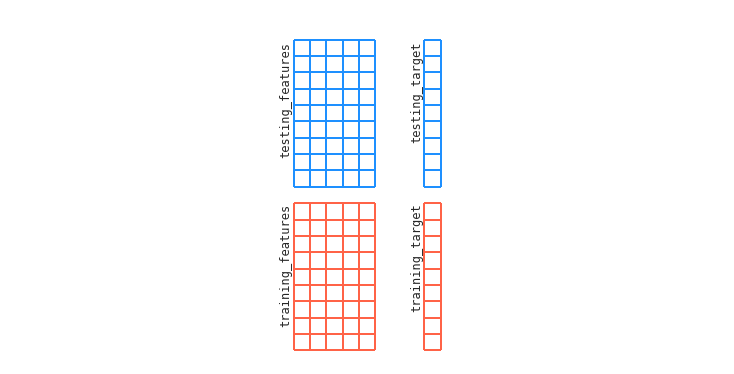

In [31]:
gfx.train_testing(figsize=(10, 5))

In [32]:
# Importamos train test split
from sklearn.model_selection import train_test_split

# Creamos un nuevo df que tiene solo los atributos que usaremos: male y age. También tiene que tener el vector objetivo: earn
df_modelo = df[["earn", "age", "male"]]

# Creamos los conjuntos de train y test
X_train, X_test, y_train, y_test = train_test_split(
    df_modelo[["age", "male"]],     # Entregamos los atributos
    df_modelo["earn"],              # Entregamos el vector objetivo
    test_size=0.33,                 # Indicamos la fracción de datos que se usará para test. Usualmente se usa entre 15% y 33% de los datos.
    random_state=42                 # Indicamos semilla seudoaleatoria para replicar la división al azar en distintas ejecuciones
)

# Exploramos las dimensiones de cada conjunto generado
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((923, 2), (456, 2), (923,), (456,))

## Generación de Predicciones

- Con nuestro modelo entrenado, lo que evaluamos es su capacidad de generar predicciones en _un nuevo conjunto de datos_ no considerados anteriormente en el entrenamiento.
- Con ello, generamos una predicción de los valores en el conjunto de prueba que podemos contrastar posteriormente

**En nuestro ejemplo**

- Nuestro modelo busca predecir el ingreso a partir de la edad y el género de una persona
- Por tanto, se debe entrenar el modelo (ajustar una recta) entregándole un conjunto de datos con distintos valores de edad y género (`X_train`), y su ingreso respectivo asociado (`y_train`)

In [33]:
# Datos de edad y género y su ingreso asociado
df_modelo.head()

,earn,age,male
0,79571.299011,49,1
1,96396.988643,62,0
2,48710.666947,33,0
3,80478.096153,95,0
4,82089.345498,43,0


In [34]:
# Atributos de entrenamiento
X_train[:5]

,age,male
292,41,0
1121,22,1
963,22,1
141,44,0
715,40,1


In [35]:
# Vector objetivo de entrenamiento
y_train[:5]

292      1028.796709
1121     3163.022911
963       -25.655260
141     16912.155569
715     57150.242872
Name: earn, dtype: float64

In [36]:
# Instanciamos y entrenamos el modelo con nuestros datos de train (atributos y vector objetivo)
modelo_rl = LinearRegression().fit(X_train, y_train)

- Con el modelo entrenado, se generan predicciones utilizando los atributos de test (`X_test`)

In [37]:
# Datos de edad y género de los cuales se busca predecir el ingreso usando el modelo entrenado
X_test[:5]

,age,male
599,35,0
881,39,1
634,50,0
425,71,1
906,44,0


In [38]:
# Se realiza predicciones del ingreso a partir de los datos de edad y género en X_test
y_hat = modelo_rl.predict(X_test)

# Exploramos algunas de las predicciones de ingreso realizadas por el modelo
y_hat[:5]

array([22729.11657555, 47427.74577884, 25471.02892286, 53277.15878642,
       24374.26398393])

## Evaluación del desempeño
- Para saber _qué tan bueno_ es el modelo entrenado realizando _predicciones_, se debe comparar los valores de las predicciones realizadas por el modelo en los datos de test (normalmente denotado `y_hat`), con los datos _reales_ asociados a los datos de test (`y_test`)

In [39]:
# Exploramos los valores reales de ingreso que tenían asociados los primeros 5 registros del conjunto test
y_test[:5].values

array([24856.16760943, 23907.50567993, 29624.85478809,  8181.73028204,
       39165.67973739])

In [40]:
# A estos valores reales, les restamos los valores de nuestras predicciones, para ver "cuánto se equivocó" el modelo en cada predicción
y_test[:5].values - y_hat[:5]

array([  2127.05103388, -23520.24009891,   4153.82586523, -45095.42850438,
        14791.41575346])

In [41]:
# Visualización más ordenada
errores_pred = pd.DataFrame({
    "y_test": y_test.values,
    "y_hat": y_hat
})

errores_pred["y_test - y_hat"] = errores_pred["y_test"] - errores_pred["y_hat"]

errores_pred.head()

,y_test,y_hat,y_test - y_hat
0,24856.167609,22729.116576,2127.051034
1,23907.505680,47427.745779,-23520.240099
2,29624.854788,25471.028923,4153.825865
3,8181.730282,53277.158786,-45095.428504
4,39165.679737,24374.263984,14791.415753


- En nuestro ejemplo, para los primeros 5 registros, vemos que nuestro modelo entrenado "se equivoca" tanto subestimando el ingreso (resultando en una diferencia positiva) como sobreestimándolo (resultando en una diferencia negativa)
<br />
<br />

- Intruitivamente, podemos observar que "si queremos saber qué tanto se equivoca el modelo, _**en promedio**_", debemos calcular el promedio de nuestras diferencias `y_test - y_hat`

In [42]:
errores_pred["y_test - y_hat"].mean()

-3654.8832090909877

- El problema es que como se tiene tanto valores positivos como negativos, estas diferencias "se cancelan" al sumarlas (recordar que el promedio primero suma todos los valores y luego los divide por el total).
    - _**Si el modelo fuera excelente y se cumplieran todos los supuestos de Gauss-Markov**_, esta suma de las diferencias _debiese ser cero_.
    <br />
    <br />
    
- Por esta razón, lo que se hace es elevar cada diferencia al cuadrado y luego _**calcular el promedio de estas diferencias al cuadrado**_, para así asegurarnos de que al realizar la suma los valores no se cancelen.

In [43]:
# Se eleva las diferencias al cuadrado
errores_pred[r"(y_test - y_hat)$^2$"] = errores_pred["y_test - y_hat"] ** 2

# Se explora los valores y corrobora que obtuvimos solo valores positivos
errores_pred.head()

,y_test,y_hat,y_test - y_hat,(y_test - y_hat)$^2$
0,24856.167609,22729.116576,2127.051034,4.524346e+06
1,23907.505680,47427.745779,-23520.240099,5.532017e+08
2,29624.854788,25471.028923,4153.825865,1.725427e+07
3,8181.730282,53277.158786,-45095.428504,2.033598e+09
4,39165.679737,24374.263984,14791.415753,2.187860e+08


In [44]:
# Se calcula el promedio de las diferencias al cuadrado
errores_pred[r"(y_test - y_hat)$^2$"].mean()

702422807.7812903

- En promedio, nuestro modelo se equivoca en 702.422.807 "dólares cuadrados" en predecir el ingreso a partir de la edad y el género.
<br />
<br />

### Métricas de desempeño: MSE y RMSE
- Lo que hemos calculado corresponde a una de las métricas de desempeño más utilizada en los modelos de predicción de variables continuas en machine learning, y corresponde a _**el error cuadrático medio**_ (normalmente llamado **ECM** o **MSE** por sus siglas en inglés).
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat y)^2
$$
<br />

- Para poder interpretar este valor de error más fácilmente, se puede calcular su raíz, lo que corresponde a la métrica de la _**raíz del error cuadrático medio**_ (normalmente llamado **RMSE**).
$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat y)^2}
$$

In [45]:
import numpy as np

# Se calcula la raíz del error cuadrático medio
np.sqrt(errores_pred[r"(y_test - y_hat)$^2$"].mean())

26503.260323614722

- En promedio, nuestro modelo se equivoca en 26.503 dólares en predecir el ingreso a partir de la edad y el género. Podemos tener una noción de si esto es "mucho o poco" observando la distribución del ingreso en nuestro conjunto de datos (_por esto y otras razones es importante realizar un análisis exploratorio previo_).

In [46]:
df_modelo["earn"].describe()

count      1379.000000
mean      32446.292622
std       31257.070006
min         -98.580489
25%       10538.790721
50%       26877.870178
75%       44506.215336
max      317949.127955
Name: earn, dtype: float64

- Ahora calculemos el error cuadrático medio utilizando `mean_squared_error` de `sklearn`

In [47]:
# Se le ingresa como argumento los valores reales (y_test) y las predicciones del modelo (y_hat)
mean_squared_error(y_test, y_hat)

702422807.7812896

In [48]:
# Coincide, solo difiere después de varios decimales
assert round(errores_pred[r"(y_test - y_hat)$^2$"].mean(), 6) == round(mean_squared_error(y_test, y_hat), 6)

## Trueque entre Sesgo y Varianza

- Recordar que _el objetivo en machine learning_ es _generar las mejores predicciones posibles en datos no conocidos por el modelo (no usados para entrenar)_. Esto se traduce en _la capacidad de generalización_ del modelo; "qué tan bueno es haciendo predicciones en datos nuevos".
<br />
<br />

- Comparemos el RMSE que obtuvimos en nuestros datos _test_ con el que se obtiene al calcularlo en los datos _train_

In [54]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat))

# Replicamos el procedimiento para obtener la métrica, pero usando los datos de entrenamiento
rmse_train = np.sqrt(mean_squared_error(y_train, modelo_rl.predict(X_train)))

rmse_test, rmse_train

(26503.260323614708, 30578.156017349917)

### Criterio de evaluación: capacidad de generalización del modelo
- El modelo tiene un mejor desemepeño en los datos de test, ya que tiene un menor error que en los datos de train. Esto nos indica que el modelo _si es capaz de generalizar_.
- Si el modelo hubiese tenido un mejor desempeño en los datos de train, sería un modelo _sobreajustado_, y por ende, con poca capacidad de generalización.

### Sesgo
- Representa una medida de **exactitud**: _¿Qué tan cercano es en promedio la estimación (es decir, la esperanza de la estimación), con respecto al valor real?_
- Es la diferencia entre el promedio de las predicciones del modelo y el valor real (sin considerar el error) que se intenta predecir

$$
\text{Sesgo}(\hat y_{\star}) = \mathbb{E}[\hat y_{\star}] - f(x_{\star})
$$
<br />
<br />
**Notas**:
- Con la fórmula anterior, es posible demostrar que el estimador de mínimos cuadrados ordinarios _tiene sesgo 0_, pero esto se consigue _asumiendo que el modelo verdadero es $\boldsymbol{x}_i^\top \boldsymbol{\beta}$_. Sin embargo, como nuestro modelo considera además un error aleatorio (que no es posible modelar), el modelo lineal resultante en la práctica tiene un _alto sesgo_, como se verá en breve.
<br />
<br />
- Mientras más _complejo_ sea un modelo (por ejemplo, con más atributos, con términos polinomiales, etc), menor será su sesgo. Por ende, mientras "más simple" sea un modelo, mayor será su sesgo.
<br />
<br />
- Un modelo con alto sesgo "se equivoca _mucho_ en train _y_ en test"; Su desempeño en los datos de train es malo, pero se espera que en promedio "_sea igual de consistentemente malo_" con los datos de test.
<br />
<br />
- Un modelo con alto sesgo se dice que está _subajustado_ (tiene "underfitting")
<br />
<br />

### Varianza
- Representa una medida de **precisión**: _¿Qué tan dispersas son las predicciones del estimador?_
- Corresponde a la variabilidad de las predicciones del modelo
$$
\text{Var}(\hat y_{\star}) = \mathbb{E}\left[(\hat y_{\star} - \mathbb{E}[\hat y_{\star}])^2 \right]
$$

**Notas**:
- Mientras más _complejo_ sea un modelo, mayor será su varianza. Por ende, mientras "más simple" sea un modelo, menor será su varianza.
<br />
<br />
- Un modelo con alta varianza "se equivoca _poco_ en train, pero se equivoca _mucho_ en test"; Su desempeño en los datos de train es muy bueno y por ende un error bajo, pero en los datos de test tendrá alto error, por lo que habrá _mucha diferencia_ entre el valor de error obtenido en train con el obtenido en test.
<br />
<br />
- Un modelo con alta varianza se dice que está _sobreajustado_ (tiene "overfitting")

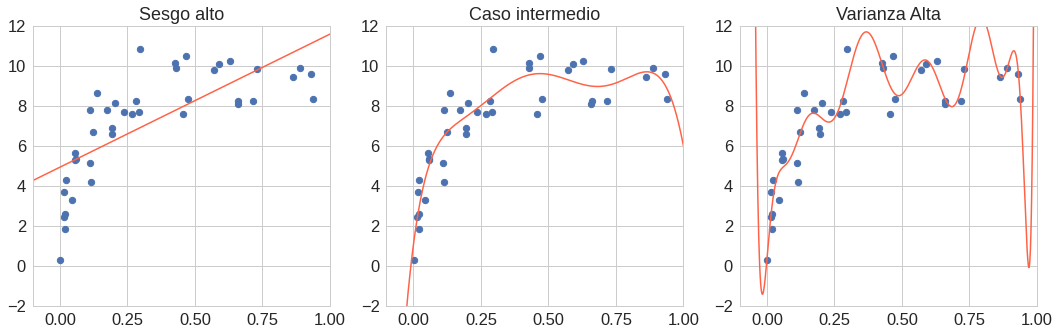

In [50]:
gfx.bias_variance(figsize=(15, 5))
plt.tight_layout()

<tr><td><img width="50%" src="https://www.researchgate.net/profile/Junhua-Ding/publication/318432363/figure/fig3/AS:667604972761097@1536180837464/Visualizing-bias-and-variance-tradeoff-using-a-bulls-eye-diagram.ppm"></td><td><img width="90%" src="https://miro.medium.com/max/1124/1*RQ6ICt_FBSx6mkAsGVwx8g.png"></td></tr>

## Curva de validación
- Evaluamos cómo se comporta el desempeño del modelo condicional a su complejidad.
- Mientras que en la muestra de entrenamiento el puntaje siempre incrementará en la medida que agreguemos más atributos, esto será ineficiente en la medida que generaremos una función no parsimoniosa que no podremos aplicar a otro conjunto de datos (tendrá peor ajuste).

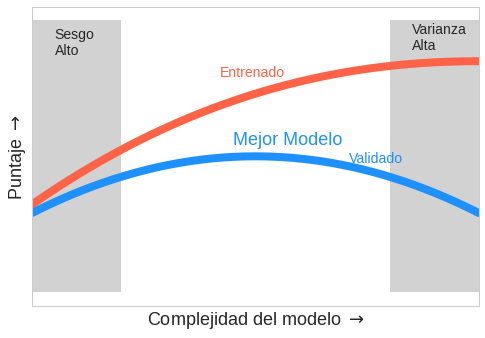

In [51]:
gfx.validate_curve()

## Curva de Aprendizaje
- Evaluamos cómo se desempeña el modelo, condicional a la cantidad de datos.
- En situaciones donde el tamaño muestral del modelo entrenado es bajo, los puntajes en serán sobrestimados en relación a los puntajes de la muestra validada.
- Esperamos que ambos modelos tiendan a converger en la medida que el tamaño muestral aumenta; Una mayor cantidad de observaciones de una muestra permite asimilar de mejor manera las características poblacionales.

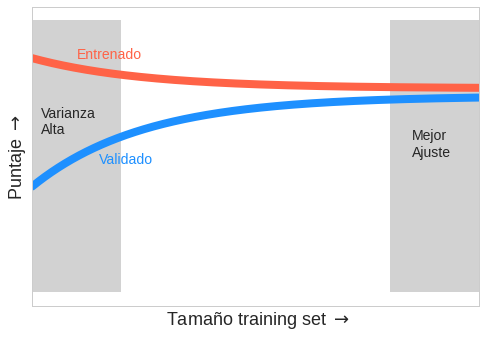

In [52]:
gfx.learning_curve()